<h2><center>Understanding Neural Networks with Tensorflow</center></h2>

In [1]:
"""importing modules"""

import tensorflow as tf #installed tensorflow - gpu version
import numpy as np
import pandas as pd

<h3>Some simple commands to get used to TensorFlow</h3>

In [5]:
hello = tf.constant('Hello, TensorFlow!')

In [6]:
sess = tf.Session()

In [7]:
print(sess.run(hello))

b'Hello, TensorFlow!'


In [8]:
# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))

[[22. 28.]
 [49. 64.]]


<h3>Understanding the graph structure of TensorFlow</h3>

In [9]:

const = tf.constant(2.0, name="const")

In [10]:
b = tf.Variable(2.0, name = 'b')
c = tf.Variable(3.0, name = 'c')

In [11]:
#declare the operations
d = tf.add(b, c, name = 'd')
e = tf.add(b, const, name = 'e')
y = tf.multiply(d, e, name = 'y')


<h5>Remember to keep all the values in the same data type</h5>

In [12]:
#set up the variable initialization
init_op = tf.global_variables_initializer()

<h5> To run the operations between the variables, we need to start a TensorFlow session – tf.Session.  The TensorFlow session is an object where all operations are run.  Using the with Python syntax, we can run the graph with the following code</h5>

In [13]:
with tf.Session() as sess:
    sess.run(init_op)
    y_out = sess.run(y)
    print('The output from tensor is : ', y_out)

The output from tensor is :  20.0


In [14]:
sess.close()

<h5>If we are not sure about a variable value we can use a placeholder instead of the actual value being initialized</h5>

In [15]:
# create TensorFlow variables
b = tf.placeholder(tf.float32, [None, 1], name='b')

In [16]:
with tf.Session() as sess:
    a_out = sess.run(a, feed_dict={b: np.arange(0, 10)[:, np.newaxis]})
    print(a_out)

[[1. 2. 3.]
 [4. 5. 6.]]


<h3>Reading and visualizing the data</h3>

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


<h5>x input layer is 784 nodes corresponding to the 28 x 28 (=784) pixels,<br> and the y output layer is 10 nodes corresponding to the 10 possible digits</h5>

<h5>trying to view the image</h5>

In [48]:
import scipy.misc as smp
import matplotlib.pyplot as plt
from matplotlib import cm
from PIL import Image
%matplotlib inline

In [19]:
mnist.train.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [20]:
np.argmax(mnist.train.labels[1])

3

In [21]:
def display(i):
    img = mnist.train.images[i]
    plt.title('Example %d. Label: %d' % (i, np.argmax(mnist.train.labels[i])))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)

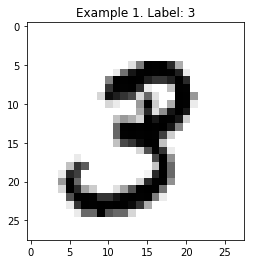

In [22]:
display(1)

<h5> so this is what the data represents</h5>

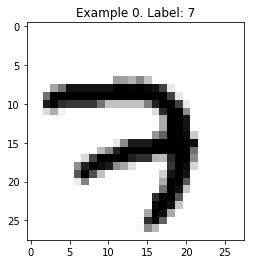

In [23]:
display(0)

In [24]:
#if i want to create a train and test data set
mnist.validation.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

<h3>Buliding a neural networks with tensor flow</h3>

<h5>Initializing the parameters</h5>

In [4]:
x = tf.placeholder(tf.float32, [None, 784])
# now declare the output data placeholder - 10 digits
y = tf.placeholder(tf.float32, [None, 10])

In [5]:
W1 = tf.Variable(tf.random_normal([784,15], stddev = 0.03), name = 'W1') #random initialization of weights
b1 = tf.Variable(tf.random_normal([15]), name = 'b1')

#random initialization fo weight for the hidden layer
W2 = tf.Variable(tf.random_normal([15, 10], stddev = 0.03), name = 'W2')#15 nodes in the hidden layer
b2 = tf.Variable(tf.random_normal([10]), name = 'b2')

hidden_in = tf.add(tf.matmul(x, W1), b1)
hidden_out = tf.nn.relu(hidden_in)

#setting up the output layer
y_out = tf.nn.softmax(tf.add(tf.matmul(hidden_out, W2), b2))

<h5>setting the loss function and accuracy measure</h5>

In [8]:
"""limited between 1e-10 to 0.999999 so that we dont do log(0) operation."""

y_clipped = tf.clip_by_value(y_out, 1e-10, 0.9999999)#an operation converting the output y_ to a clipped version, 

"""defining the loss function"""
cross_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped)
                         + (1 - y) * tf.log(1 - y_clipped), axis=1))


"""defining accuracy operation"""
# correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_out, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


<h3>Function to train Neural Network on train and validation data set</h3>

In [72]:
def run_nn(batch_size = 100,learning_rate = 0.1,epochs = 200, is_save = False):

    """initializing an optimizer"""
    optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

    """initializing the varibales"""
    init_op = tf.global_variables_initializer()
    
    """initializing the output lists"""

    accuracy_per_epoch = []
    accuracy_per_epoch_validation = []
    diff_loss_list = []

    """initialize a saver function"""
    
    saver = tf.train.Saver()

    """start the session"""
    
    with tf.Session() as sess:
        
        """initialise the variables"""
        sess.run(init_op)
        total_batch = int(len(mnist.train.labels) / batch_size)
        prev_avg_loss = 0
        
        """iteration for each epoch"""
        
        for epoch in range(epochs):
            
            avg_acc = 0
            avg_loss = 0
            
            """iterating for each batch"""
            
            for i in range(total_batch):
                batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
                
                #calculating the loss and the accuracy at each iteration
                
                _, c_acc, c_loss = sess.run([optimiser, accuracy, cross_entropy], 
                             feed_dict={x: batch_x, y: batch_y})
                
                #setting the average of an batch as the accuracy and loss
                avg_acc += c_acc / total_batch
                avg_loss += c_loss / total_batch
                
            """checking the performance on the validation dataset"""
            
            q_acc, q_loss = sess.run([accuracy, cross_entropy], feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
            
            accuracy_per_epoch.append(avg_acc)
            accuracy_per_epoch_validation.append(q_acc)
            if(epoch > 1):
                diff_loss = prev_avg_loss - avg_loss
                diff_loss_list.append(diff_loss)
            
#             if(diff_loss > ):
#                 break
                
            prev_avg_loss = avg_loss
        if(is_save == True):
            save_path = saver.save(sess, "/tmp/model.ckpt")
            print("Model saved in path: %s" % save_path)
        print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: mnist.test.images,
                                      y: mnist.test.labels}))
    return accuracy_per_epoch, accuracy_per_epoch_validation, diff_loss_list

In [47]:
accuracy_per_epoch, accuracy_per_epoch_validation, diff_loss_list = run_nn(is_save == True)

Model saved in path: /tmp/model.ckpt


<h3>Plotting the accuracy and difference between iterations chart</h3>

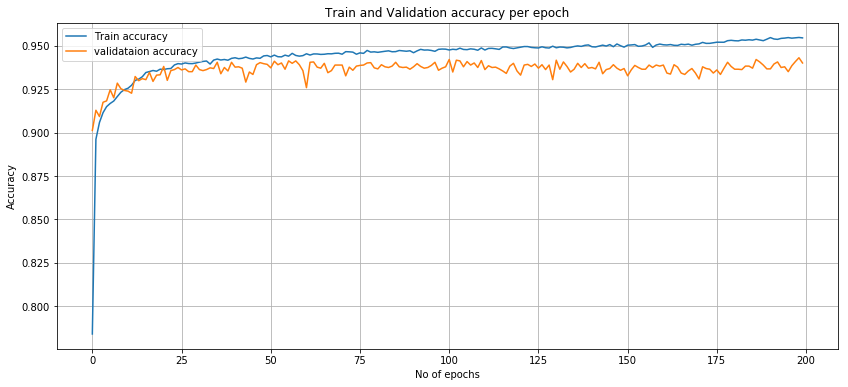

In [48]:
plt.figure(figsize = (14,6))
plt.plot(accuracy_per_epoch, label = 'Train accuracy')
plt.plot(accuracy_per_epoch_validation, label = 'validataion accuracy')
plt.legend()
plt.xlabel('No of epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.title('Train and Validation accuracy per epoch')
plt.show()

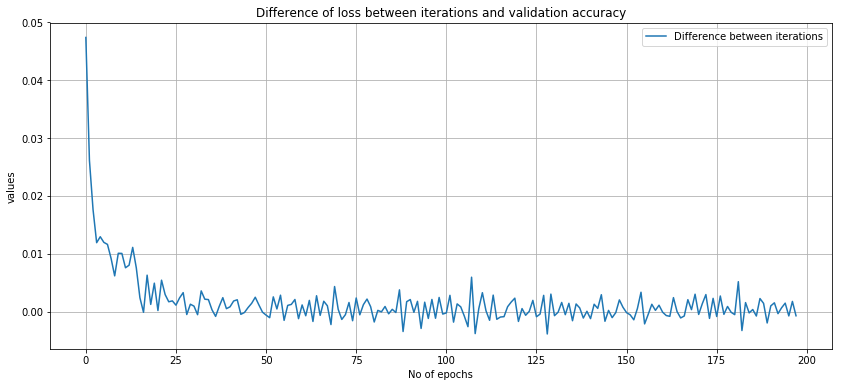

In [49]:
plt.figure(figsize = (14,6))
plt.plot(diff_loss_list, label = 'Difference between iterations')
# plt.plot(accuracy_per_epoch_validation, label = 'validataion accuracy')
plt.legend()
plt.xlabel('No of epochs')
plt.ylabel('values')
plt.grid()
plt.title('Difference of loss between iterations and validation accuracy')
plt.show()

<h5>Inference :<br><br>
1. The validataion accuracy and the train accuracy increases together till the 50 th iteration, after which increase in training accuracy is not reflected by the validataion accuracy.<br><br>
2. The loss difference between epochs decreases steadily and steadies over the 50 th iteration after which it remains stagnent.<br><br>
3. The testing accuracy was found to be 94%. Which means the data is linearly seperable.
<br>
    

<h3>Restoring the saved model and predicting testing accuracy</h3>

In [9]:
with tf.Session() as sess:
    
    saver = tf.train.Saver()
    saver.restore(sess, "/tmp/model.ckpt")
    
    """prediction accuracy calculation """
    
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: mnist.test.images,
                                      y: mnist.test.labels}))

INFO:tensorflow:Restoring parameters from /tmp/model.ckpt
Testing Accuracy: 0.9399


<h5>Inference:<br>Testing accuracy of 0.94 has been achieved using the un optimized neural network</h5>

In [70]:
"""Creating a function to help plotting for the grid search"""

def plot(accuracy_per_epoch, accuracy_per_epoch_validation, diff_loss_list):
    plt.figure(figsize = (14,6))
    plt.plot(accuracy_per_epoch, label = 'Train accuracy')
    plt.plot(accuracy_per_epoch_validation, label = 'validataion accuracy')
    plt.legend()
    plt.xlabel('No of epochs')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.title('Train and Validation accuracy per epoch')
    plt.show()

    plt.figure(figsize = (14,6))
    plt.plot(diff_loss_list, label = 'Difference between iterations')
    # plt.plot(accuracy_per_epoch_validation, label = 'validataion accuracy')
    plt.legend()
    plt.xlabel('No of epochs')
    plt.ylabel('values')
    plt.grid()
    plt.title('Difference of loss between iterations and validation accuracy')
    plt.show()
    
    print("###################################################################################")

<h3>Optimizing hyper parameters using grid search</h3>

In [54]:
"""values to be optimized"""

candidate_hidden_layers = [1, 2]
candidate_nodes_per_layer = [15, 25]

In [67]:
"""creating the neural network"""

def create_run_nn(no_hidden_layers, nodes_input_layer, nodes_output_layer, nodes_per_layer, epoch):
    
    """set x and y"""
    x = tf.placeholder(tf.float32, [None, nodes_input_layer])
    y = tf.placeholder(tf.float32, [None, nodes_output_layer])
    
    W1 = tf.Variable(tf.random_normal([nodes_input_layer,nodes_per_layer], stddev = 0.03), name = 'W1') #random initialization of weights
    b1 = tf.Variable(tf.random_normal([nodes_per_layer]), name = 'b1')
        
    if(no_hidden_layers == 2):
        
        W2 = tf.Variable(tf.random_normal([nodes_per_layer, nodes_per_layer], stddev = 0.03), name = 'W2')#15 nodes in the hidden layer
        b2 = tf.Variable(tf.random_normal([nodes_per_layer]), name = 'b2')
        
        W3 = tf.Variable(tf.random_normal([nodes_per_layer, nodes_output_layer], stddev = 0.03), name = 'W3')#15 nodes in the hidden layer
        b3 = tf.Variable(tf.random_normal([nodes_output_layer]), name = 'b3')
        
        hidden_in_1 = tf.add(tf.matmul(x, W1), b1)
        hidden_in_2 = tf.add(tf.matmul(hidden_in_1, W2), b2)
        hidden_out = tf.nn.relu(hidden_in_2)

        #setting up the output layer
        y_out = tf.nn.softmax(tf.add(tf.matmul(hidden_out, W3), b3))
    
    else:

        #random initialization fo weight for the hidden layer
        W2 = tf.Variable(tf.random_normal([nodes_per_layer, nodes_output_layer], stddev = 0.03), name = 'W2')#15 nodes in the hidden layer
        b2 = tf.Variable(tf.random_normal([nodes_output_layer]), name = 'b2')

        hidden_in = tf.add(tf.matmul(x, W1), b1)
        hidden_out = tf.nn.relu(hidden_in)

        #setting up the output layer
        y_out = tf.nn.softmax(tf.add(tf.matmul(hidden_out, W2), b2))
    
    """limited between 1e-10 to 0.999999 so that we dont do log(0) operation."""

    y_clipped = tf.clip_by_value(y_out, 1e-10, 0.9999999)#an operation converting the output y_ to a clipped version, 

    """defining the loss function"""
    cross_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped)
                             + (1 - y) * tf.log(1 - y_clipped), axis=1))


    """defining accuracy operation"""
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_out, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    """running the nn"""
    print('Running NN with '+str(no_hidden_layers)+ ' hidden layers and ' + str(nodes_per_layer) + ' nodes per layer.' )
    accuracy_per_epoch, accuracy_per_epoch_validation, diff_loss_list = run_nn(epochs = epoch)
    
    print('Plotting NN with '+str(no_hidden_layers)+ ' hidden layers and ' + str(nodes_per_layer) + ' nodes per layer.' )
    plot(accuracy_per_epoch, accuracy_per_epoch_validation, diff_loss_list)
    

In [65]:
def grid_search_nn(candidate_hidden_layers = [1, 2], candidate_nodes_per_layer = [15, 25], epoch = 10):
    for no_hidden_layers in candidate_hidden_layers:
        for nodes_per_layer in candidate_nodes_per_layer:
            create_run_nn(no_hidden_layers, 784, 10, nodes_per_layer, epoch)

Running NN with 1 hidden layers and 15 nodes per layer.
Testing Accuracy: 0.9483
Plotting NN with 1 hidden layers and 15 nodes per layer.


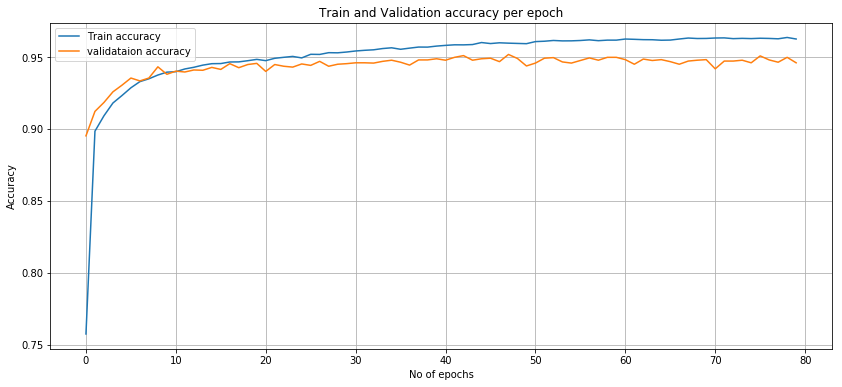

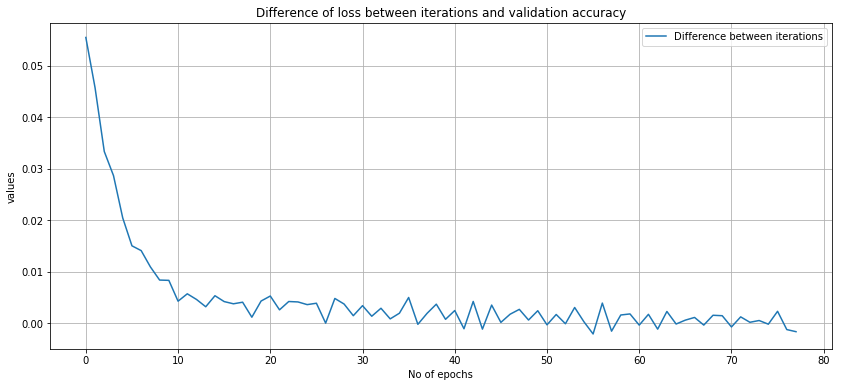

###################################################################################
Running NN with 1 hidden layers and 25 nodes per layer.
Testing Accuracy: 0.9519
Plotting NN with 1 hidden layers and 25 nodes per layer.


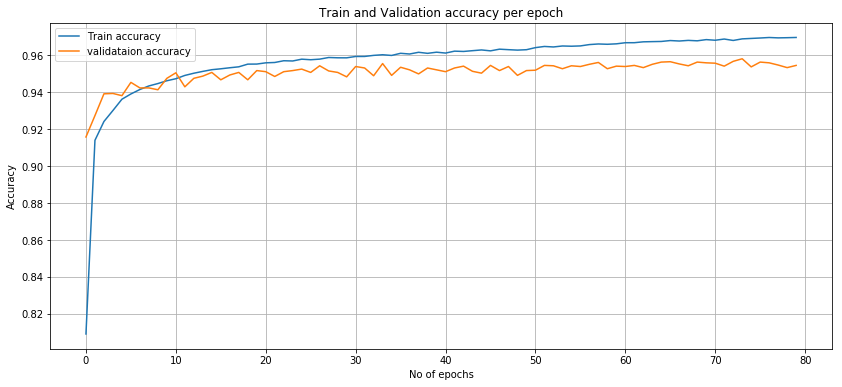

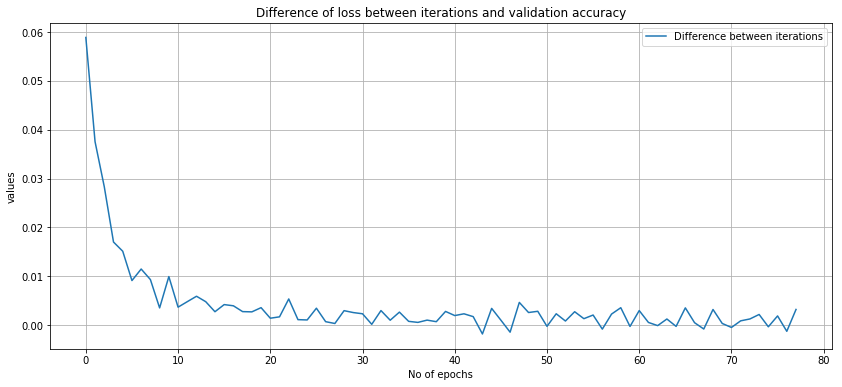

###################################################################################
Running NN with 2 hidden layers and 15 nodes per layer.
Testing Accuracy: 0.9437
Plotting NN with 2 hidden layers and 15 nodes per layer.


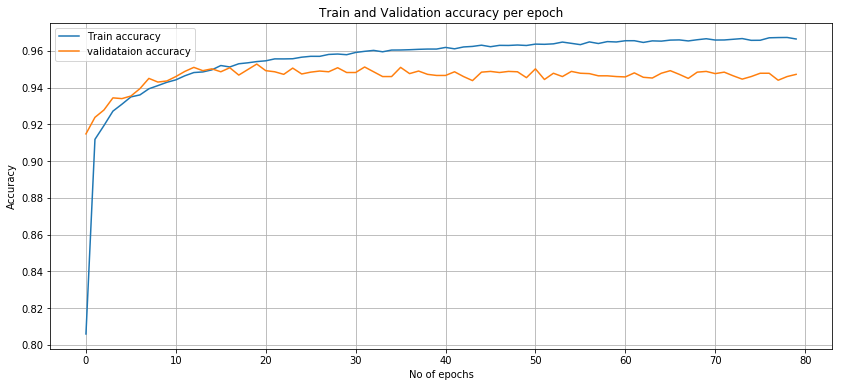

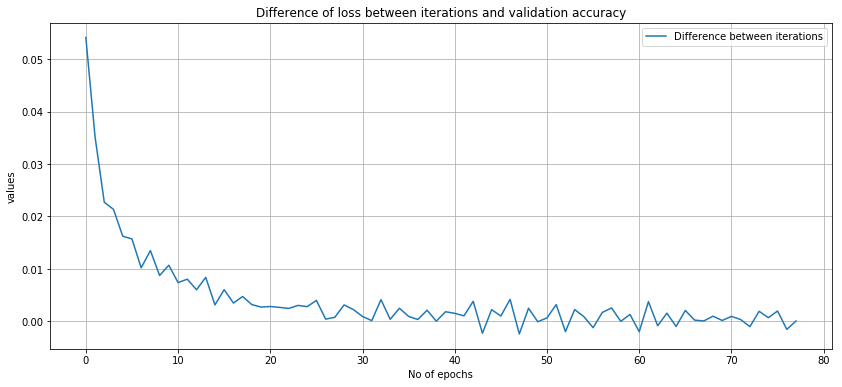

###################################################################################
Running NN with 2 hidden layers and 25 nodes per layer.
Testing Accuracy: 0.9426
Plotting NN with 2 hidden layers and 25 nodes per layer.


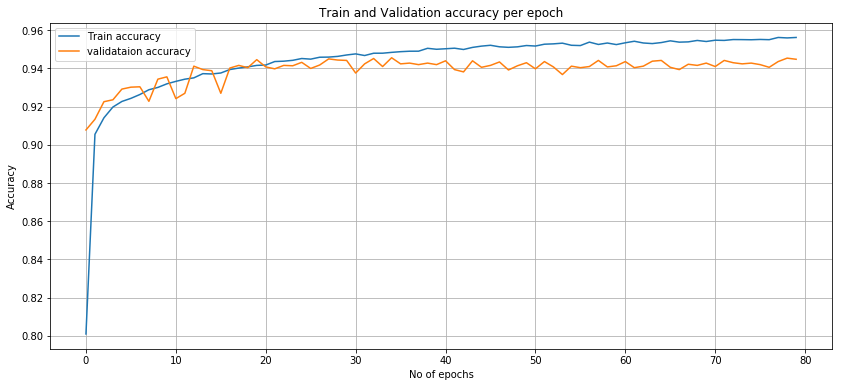

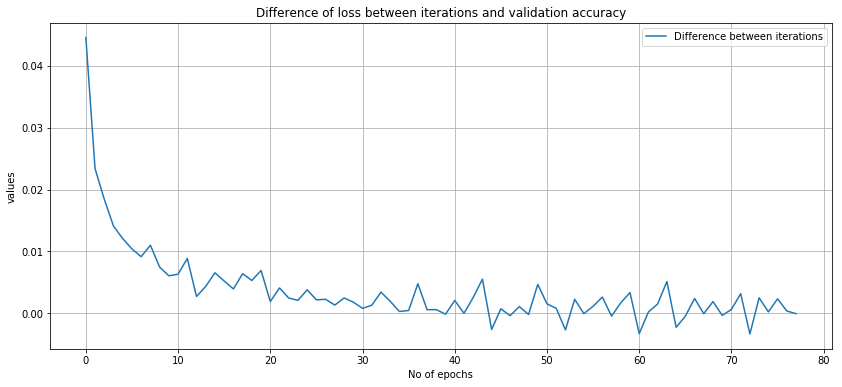

###################################################################################


In [73]:
grid_search_nn(epoch = 80)

<h5>Findings: <br><br>
Accuracy of 1 hidden layers and 15 nodes per layer : 0.9483<br><br>
Accuracy of 1 hidden layers and 25 nodes per layer : 0.9519<br><br>
Accuracy of 2 hidden layers and 15 nodes per layer : 0.9437<br><br>
Accuracy of 2 hidden layers and 25 nodes per layer : 0.9426<br><br></h5>

<h5>Inference: <br><br>
1. As number of nodes increase, the accuracy of the model is supposed to be more until the model starts overfitting the data. <br><br>
2. Here the model data was a toy data set and linearly separable as we have a really good accuracy with just 1 hidden layer and 15 nodes in hidden layer. Because, of which we might not see a big difference with respect to increase in number of nodes and layers.<br><br>
3. In more complex problems the accuracy of the model would be higher if the number of hidden layers are more.As this would be able to extract more features from the data.<br><br>
<br><br></h5>